# SymPy -- symbolic computation

Symbolic computation is the computation of mathematical objects in an analytical way. 
The mathematical objects are represented exactly and not only approximately. For example $\sqrt{8}$ will not approximated as $\sqrt{8} = 2.82842712475$, it will be done as:

In [1]:
#pip install sympy

In [2]:
import sympy as sp
sp.sqrt(8)

2*sqrt(2)

Furthermore one can define expressions, equations and more 

In [3]:
x, y = sp.symbols('x y')
expr=x+3*y
print(expr)
expr+1

x + 3*y


x + 3*y + 1

Differentiation, Integration, computation of limits is possible:

In [4]:
sp.diff(sp.sin(x)+3*x**2+4*x,x)

6*x + cos(x) + 4

In [5]:
sp.integrate(x**2*sp.exp(x),x)


(x**2 - 2*x + 2)*exp(x)

In [6]:
sp.integrate(x**2*sp.exp(x),(x,0,10))


-2 + 82*exp(10)

In [7]:
sp.integrate(x**2*sp.exp(x),(x,0,10)).evalf()


1806168.19517415

In [8]:
sp.limit(sp.sin(x)/x,x,0)

1

## Task

Differentiate, integrate some expressions of your choice and compute the limits of some series

In [9]:
x = sp.symbols('x')
expression = 5*x**4 + 12*x**3 + x*1/3 + 7
print(sp.diff(expression,x))
print(sp.integrate(expression, (x,-1,1)))
print(sp.limit(expression, x,sp.oo))

20*x**3 + 36*x**2 + 1/3
16
oo



### Floating point representation

Sometimes it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).


In [10]:
sp.sqrt(2).evalf(10)

1.414213562

## Task

Evaluate $\pi$ from sympy with hundred digits. 

Then write a functions which uses Leibniz Formula 
$$ 1 - \frac{1}{3} + \frac{1}{5} -  \frac{1}{7}  + \frac{1}{9}  + - \cdots = \frac{\pi}{4} $$
to approximate $\pi$ with $n$ summands from the formula above. Make a convergence test - how many summands you need to get $m=5$ digits of $\pi$

In [11]:
sp.pi.evalf(100)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117068

In [12]:
def piapprox(n):
    p=1
    s=-1
    for i in range(1,n):
        p=p+s*1.0/(2*i+1)
        s=-s
    return p


print(4*piapprox(100000000))

3.141592643589326


In [13]:
piapprox(500)*4

3.139592655589785

## Solving equations

Sympy can solve equations, for example roots of polynomials

In [14]:
sp.solve(-x**2+3*x+4,x)

[-1, 4]

Not all is possible in exact computation

In [15]:
sp.solve(sp.exp(x)-sp.sin(x),x)

NotImplementedError: multiple generators [exp(x), sin(x)]
No algorithms are implemented to solve equation exp(x) - sin(x)

but it can be approximated in a numerical way. Play around with different starting values.

In [16]:
sp.nsolve(sp.exp(x)-sp.sin(x),0)

-15.7079634186507

It is possible to solve systems, for example the intersection of a circle and a line:


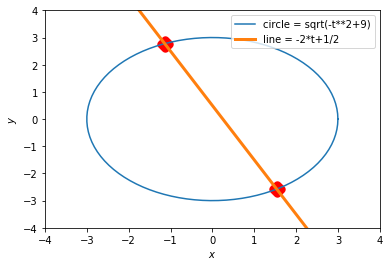

(-1.13790881602597, 2.77581763205193)


In [17]:
import matplotlib.pyplot as plt
import numpy as np
#Solver:
x,y = sp.symbols("x y")
eq1 = x**2 + y**2 - 9  # circle of radius 3
#eq2 = 2*x + y - sp.Rational(1,2)   # line y(x) = -2*x + 1/2
eq2 = 2*x + y - 1/2  # try out what happens here

[sol1, sol2] = sp.solve([eq1, eq2], [x, y])

t = np.linspace(0,2*np.pi,100)
t2 = np.linspace(-3,3)
#line = -2*t+1/2
#circle = np.sqrt(-t**2+9)
r=3
x1 = r*np.cos(t)
x2 = r*np.sin(t)
x3 = -2 * t2+ 1/2
fig, ax = plt.subplots()

ax.plot(x1,x2)
ax.plot(t2,x3, linewidth = 3.0)
ax.scatter(sol1[0], sol1[1], color  = 'r', marker = 'D', linewidth = 8)
ax.scatter(sol2[0], sol2[1], color  = 'r', marker = 'D', linewidth = 8)


ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ax.legend(['circle = sqrt(-t**2+9)',  'line = -2*t+1/2'], loc='upper right')
plt.show()

print(sol1)


## Task

Make a geometrical interpretation to the following system of equations
$$ x^2+y^2+z^2=1 $$
$$ z=x^2+y^2 $$
$$ y=0 $$
and then solve this system, dump the solutions as expressions and as floating point numbers.
Then interprete the solutions.

## Task

Now define your own geometrical problem in the space $R^3$. It should have $4$ points in $R^3$ as solution.

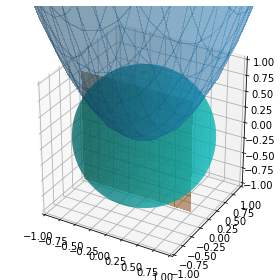


 (-sqrt(-1/2 + sqrt(5)/2), 0, -1/2 + sqrt(5)/2)
-0.786151377757423
0
0.618033988749895

 (sqrt(-1/2 + sqrt(5)/2), 0, -1/2 + sqrt(5)/2)
0.786151377757423
0
0.618033988749895

 (-sqrt(-sqrt(5)/2 - 1/2), 0, -sqrt(5)/2 - 1/2)
-1.27201964951407*I
0
-1.61803398874989

 (sqrt(-sqrt(5)/2 - 1/2), 0, -sqrt(5)/2 - 1/2)
1.27201964951407*I
0
-1.61803398874989


In [18]:
#The first equation is a unit ball 3dim
#The second equation is a hyperplane as plotted below
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2
Xzero = np.arange(-1, 1, 0.25)
Zzero = np.arange(-1, 1, 0.25)
Xzero, Zzero = np.meshgrid(Xzero, Zzero)
Yzero = Xzero*0 + Zzero*0
# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Set colours and render
murf  = ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)

surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha = 0.3)
turf = ax.plot_surface(Xzero, Yzero, Zzero, linewidth=0, antialiased=False, alpha = 0.5)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_aspect("equal")
plt.tight_layout()
plt.show()
#The third equation just sets y=0
#so we are looking at the intersections between a unit ball, a hyperplane on y=0

z, x, y=sp.symbols('z x y') # x and y are already symbols 
eq1 = x**2 + y**2 + z**2 - 1
roots1 = sp.solve(eq1,x, y, z)
eq2 = x**2 + y**2 - z
roots2 = sp.solve(eq2,x, y, z)
eq3 = y
sol = sp.solve([eq1, eq2, eq3], (x, y,z))
for s in sol:
    print('\n',s)
    for t in list(s):
        print(t.evalf())

In [19]:
# TODO

## Task

Now a task for integration and solving of equations. We consider the affine linear function
$$f(x)=m x + 1 \quad m \in R$$ 
and the parabola
$$g(x)=(x-1)^2$$

Make a sketch of the functions (on a sheet of paper, not here) 
and then compute $m$ such that the area between the graphs of this functions is $1$.
  * Hint 1 : you need the intersection points of the functions, depending on m
  * Hint 2 : you get the area between the functions with integrals between the intersection points 
  * Hint 3 : then you have the area A(m) and can solve A(m)=1
  * Hint 4 : check your solution at the end of all with a probe

In [20]:
#Intersection Point with a fixed m = 2
x = sp.symbols('x')
f_x = 2*x+1
g_x = (x-1)**2
ints = sp.solve(f_x  - g_x, x)
print(ints[1])

4


In [21]:
#integral over this
lin = sp.integrate(f_x, (x, 0, ints[1]))
par = sp.integrate(g_x, (x, 0, ints[1]))
space = lin - par
print(space.evalf())

10.6666666666667


In [22]:
#Intersection Point depending on m
x, m = sp.symbols('x m')
f_x = m*x+1
g_x = (x-1)**2
ints = sp.solve(f_x  - g_x, x)
lin = sp.integrate(f_x, (x, 0, ints[1]))
par = sp.integrate(g_x, (x, 0, ints[1]))
space = lin - par
sol = sp.solve(space - 1, m)
print(sol[0].evalf())

-0.182879407167860


In [23]:
#test
x = sp.symbols('x')
f_x = -0.182879407167860*x+1
g_x = (x-1)**2
ints = sp.solve(f_x  - g_x, x)
lin = sp.integrate(f_x, (x, 0, ints[1]))
par = sp.integrate(g_x, (x, 0, ints[1]))
space = lin - par
print(space.evalf())

1.00000000000000


## Differential equations 

Sympy can solve differential equations like

$$u'(t)=a u(t) \qquad a \in R$$ 

which is an example for exponential growth (a>0) or exponential decay (a<0). Such equations can model 
the growth of microbes or radioactive disintegration.

In [24]:
u=sp.Function('u')
t=sp.symbols('t')
a=sp.symbols('a')
sp.dsolve(u(t).diff(t, 1) - a*u(t))

Eq(u(t), C1*exp(a*t))

## Task 

Solve the problem for the logistic equation

$$ u'(t) = au(t) - bu^2(t) $$

and interpret the solution for $a=b=1$. Find out if there exist equilibrium states where $u(t)=const$ which is equivalent to $u'(t)=0$



In [25]:
u=sp.Function('u')
t=sp.symbols('t')
a, b =sp.symbols('a b')
expression = sp.dsolve(u(t).diff(t, 1) - a*u(t) - b*u(t)*u(t))

In [26]:
#a=b=1
sp.dsolve(u(t).diff(t, 1) - u(t) - u(t)*u(t))

Eq(u(t), 1/(C1*exp(-t) - 1))

In [27]:
equilibrium = sp.solve(expression, u(t))
print(equilibrium)

[a*exp(a*(C1 + t))/(b*(1 - exp(a*(C1 + t))))]
